## Problem Statement/Goal



## Imports

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from warnings import filterwarnings

from sklearn.model_selection import train_test_split

## Data Collection

In [225]:
# data was obtained at https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/
test_df  = pd.read_csv('./data/test_Y3wMUE5_7gLdaTN.csv')
train_df_raw = pd.read_csv('./data/train_u6lujuX_CVtuZ9i.csv')

## Initial Viewing and Cleaning

In [156]:
train_df_raw.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [192]:
mask = train_df_raw['ApplicantIncome'] < 1000
train_df_raw[mask]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
216,LP001722,Male,Yes,0,Graduate,No,150,1800.0,135.0,360.0,1.0,Rural,N
468,LP002502,Female,Yes,2,Not Graduate,NaN,210,2917.0,98.0,360.0,1.0,Semiurban,Y
500,LP002603,Female,No,0,Graduate,No,645,3683.0,113.0,480.0,1.0,Rural,Y
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N


In [193]:
mask = train_df['Coapplicant_True'] == 0
train_df_raw[mask]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
15,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
18,LP001038,Male,Yes,0,Not Graduate,No,4887,0.0,133.0,360.0,1.0,Rural,N
20,LP001043,Male,Yes,0,Not Graduate,No,7660,0.0,104.0,360.0,0.0,Urban,N
25,LP001066,Male,Yes,0,Graduate,Yes,9560,0.0,191.0,360.0,1.0,Semiurban,Y
28,LP001086,Male,No,0,Not Graduate,No,1442,0.0,35.0,360.0,1.0,Urban,N


In [210]:
mask = train_df_raw['Loan_Amount_Term'].isna()
train_df_raw[mask]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
165,LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,LP001770,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y


In [222]:
# Percent of monthly income going to paying off the loan w/o interest
#(LoanAmount*1000)/Loan_Amount_Term

#66000/360       # Monthly_Payment( sans interest)
(66000/360)/3000 # Percent of monthly income going to paying off the loan w/o interest

0.061111111111111116

In [227]:
train_df = train_df_raw

In [229]:
((train_df['LoanAmount']*1000)/train_df['Loan_Amount_Term'])/train_df['ApplicantIncome']

0           NaN
1      0.077581
2      0.061111
3      0.129049
4      0.065278
5      0.136915
6      0.113111
7      0.144562
8      0.116492
9      0.075496
10     0.060764
11     0.121111
12     0.180786
13     0.170894
14     0.109058
15     0.070146
16     0.115869
17     0.060146
18     0.075597
19          NaN
20     0.037714
21     0.146935
22     0.123932
23     0.092455
24     0.112845
25     0.055497
26     0.121075
27     0.072304
28     0.067422
29     0.088889
         ...   
584    0.145517
585    0.478081
586    0.125768
587    0.089813
588    0.054971
589    0.108013
590    0.103704
591    0.142361
592    0.086685
593    0.204428
594    0.044803
595    0.079717
596    0.081379
597    0.081836
598    0.050186
599    0.092272
600    4.674145
601    0.148775
602    0.062345
603    0.129972
604    0.114815
605         NaN
606    0.141340
607    0.109383
608    0.092822
609    0.068008
610    0.054121
611    0.087064
612    0.068501
613    0.080612
Length: 614, dtype: floa

TypeError: __call__() got an unexpected keyword argument 'index'

In [214]:
# Updating the 
train_df['Term_In_Years'] = train_df['Loan_Amount_Term'].fillna(0).map(lambda x: int(x/12))

In [216]:
train_df_raw['Loan_Amount_Term'].fillna(0).map(lambda x: int(x/12))

0      30
1      30
2      30
3      30
4      30
5      30
6      30
7      30
8      30
9      30
10     30
11     30
12     30
13     30
14     10
15     30
16     20
17     30
18     30
19      0
20     30
21     30
22     30
23     30
24     30
25     30
26     30
27     30
28     30
29     30
       ..
584    30
585     7
586    30
587    30
588    30
589    30
590    15
591    20
592    30
593    15
594    30
595    30
596    30
597    30
598    30
599    30
600    15
601    30
602    30
603    30
604    30
605    15
606    30
607    30
608    30
609    30
610    15
611    30
612    30
613    30
Name: Loan_Amount_Term, Length: 614, dtype: int64

In [157]:
train_df_raw.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#['No_Coapplicant']
def
train_df_raw.map(lambda x: x)

In [ ]:
train

In [179]:
# Feature Engeenering column for if there's a coapplicant or not
train_df['Coapplicant_True'] = train_df_raw['CoapplicantIncome'].map(lambda x: 1 if x > 0 else 0)

In [158]:
# Dummying categorical data and droping the Loan_ID
train_df = pd.get_dummies(train_df_raw.drop(['Loan_ID'], axis=1))

In [159]:
# Function to determine size percentage if dropped all nulls remaining
def drop_percent(df):
    total_rows,total_columns = df.shape
    dropped_rows, dropped_columns = df.dropna().shape
    return"Percentage of rows remaining, post-drop = {}".format(dropped_rows/total_rows)

In [170]:
# Listing nulls
train_df['Loan_Amount_Term'].isnull().sum()

14

In [168]:
train_df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [161]:
# Get Dummies comes equipt to automaticall drop one of the dummie columns,
# However, I prefer to select which columns to drop, manually.
train_df.drop(['Gender_Male',   
               'Married_No',    
               'Dependents_0',
               'Education_Not Graduate',
               'Self_Employed_No',
               'Loan_Status_N']
              , axis=1, inplace = True)

In [171]:
mask = train_df_raw['Loan_Amount_Term'].isnull()
train_df[mask]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
19,2600,3500.0,115,NaN,1,0,1,0,0,0,1,0,0,0,1,1
36,1828,1330.0,100,NaN,0,0,1,0,0,0,1,0,0,0,1,0
44,4695,0.0,96,NaN,1,0,1,0,0,0,0,1,0,0,1,1
45,3410,0.0,88,NaN,1,1,0,0,0,0,1,0,0,0,1,1
73,4755,0.0,95,NaN,0,0,1,0,0,1,0,0,0,1,0,0
112,3572,4114.0,152,NaN,0,0,1,0,0,0,0,0,1,0,0,0
165,3707,3166.0,182,NaN,1,0,1,0,0,0,1,0,1,0,0,1
197,1907,2365.0,120,NaN,1,1,0,0,0,0,0,0,0,0,1,1
223,7578,1010.0,175,NaN,1,0,1,0,0,0,1,0,0,1,0,1
232,3189,2598.0,120,NaN,1,0,0,0,0,0,0,0,1,0,0,1


In [165]:
filterwarnings("ignore") # Silencing warning about copying over the slice of DataFrame, for now.
train_df['Credit_History'] = train_df['Credit_History'].fillna('0').map(lambda x: int(x))
train_df['LoanAmount']     = train_df['LoanAmount'].fillna('0').map(lambda x: int(x))

In [163]:
drop_percent(train_df)

'Percentage of rows remaining, post-drop = 0.9413680781758957'

In [19]:
train_df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [56]:
train_df = train_df.dropna()

## Exploritory Data Analysis

In [104]:
train_df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Loan_Status_Y'],
      dtype='object')

In [111]:
def list_corrs(df, target):
    return df.corr().sort_values([str(target)])[str(target)]
list_corrs(train_df, 'Loan_Status_Y')

Property_Area_Rural       -0.101086
CoapplicantIncome         -0.064004
Property_Area_Urban       -0.042701
Dependents_1              -0.035539
Loan_Amount_Term          -0.021268
Gender_Female             -0.020655
Dependents_3+             -0.019558
LoanAmount                -0.013950
Self_Employed_Yes         -0.012721
ApplicantIncome           -0.005747
Dependents_2               0.060773
Education_Graduate         0.081985
Married_Yes                0.087471
Property_Area_Semiurban    0.135638
Credit_History             0.414444
Loan_Status_Y              1.000000
Name: Loan_Status_Y, dtype: float64

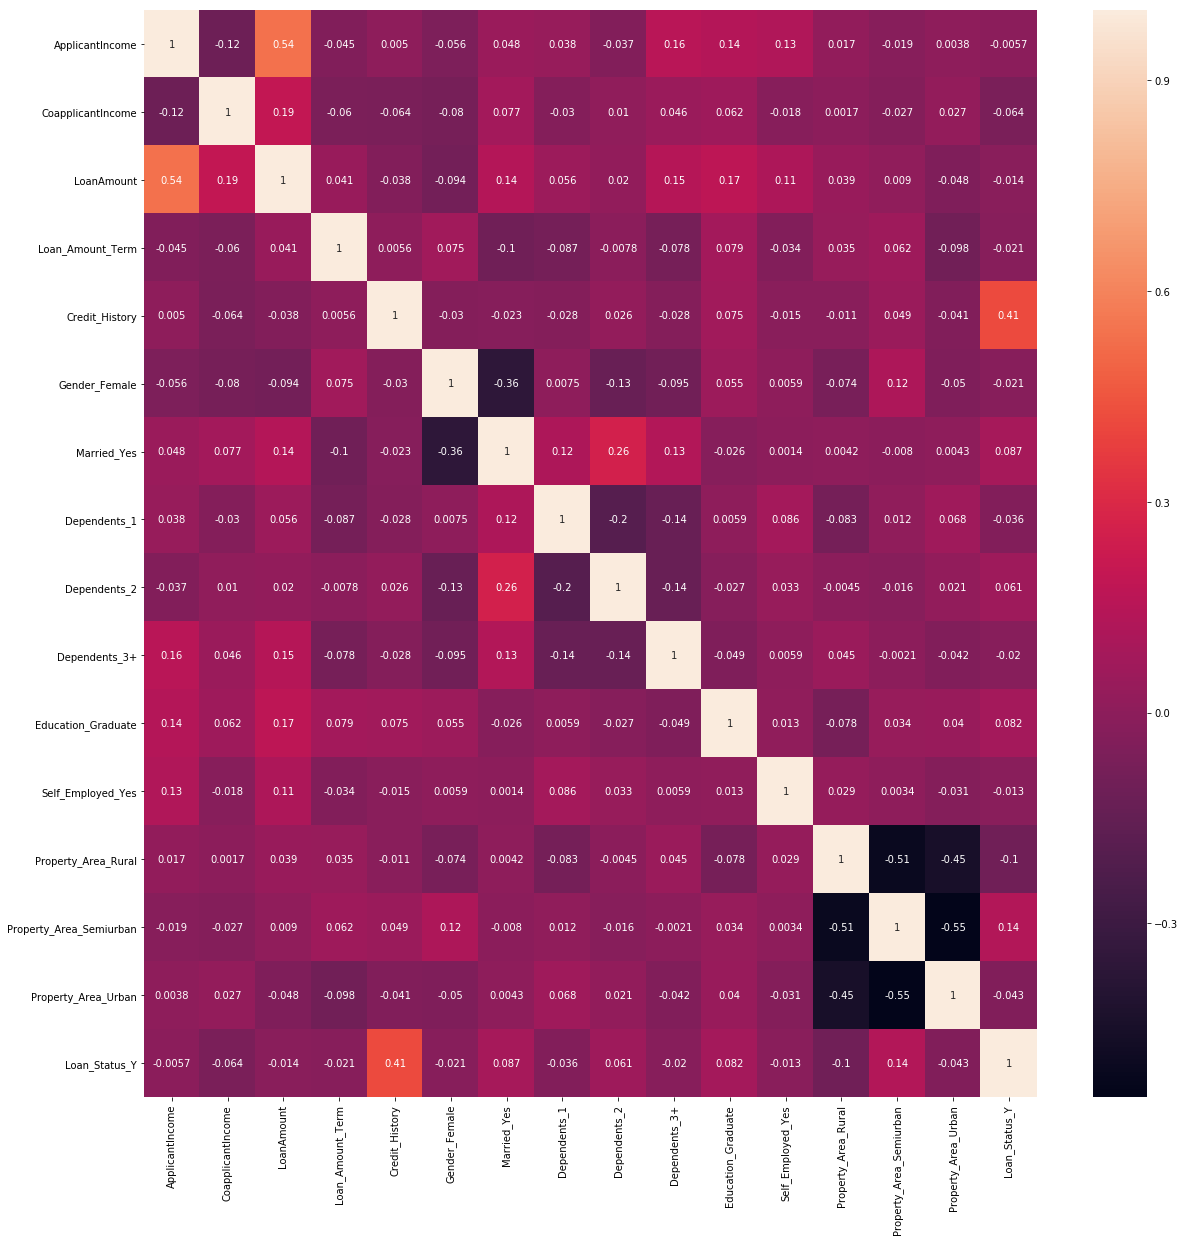

In [120]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(train_df.corr(), annot=True)

In [89]:
train_df['LoanAmount'] = train_df['LoanAmount'].map(lambda x: int(x))
#df.column = df.column.map(lambda x: float(x.replace(',','.')))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Model Prep

### Model Imports & Initiations

### Data Prep

In [ ]:
#features = 
X = df[features]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y)

## Initial Model and Results

In [100]:
from sklearn.linear_model import LinearRegression

# t/ts and StandardScaler here-ish?
lin_reg = LinearRegression()
features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban']
X = train_df[features]
y = train_df['Loan_Status_Y']

model = lin_reg.fit(X,y)
model.score(X,y)


0.2048815641931836

In [131]:
from sklearn.linear_model import LogisticRegression

# t/ts and StandardScaler here-ish?
log_reg = LogisticRegression()
features = ['Credit_History', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban']
X = train_df[features]
y = train_df['Loan_Status_Y']

model = log_reg.fit(X,y)
model.score(X,y)


0.765

In [134]:
from sklearn.linear_model import LogisticRegression

# t/ts and StandardScaler here-ish?
log_reg = LogisticRegression()
features = ['Credit_History', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban']
X = train_df[features]
y = train_df['Loan_Status_Y']

model = log_reg.fit(X,y)
model.score(X,y)


0.765

In [131]:
from sklearn.linear_model import LogisticRegression
mask = (sale_price_corr['SalePrice'] > 0.2) | (sale_price_corr['SalePrice'] < -0.2)
# t/ts and StandardScaler here-ish?
log_reg = LogisticRegression()
features = ['Credit_History', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban','Education_Graduate']
X = train_df[features]
y = train_df['Loan_Status_Y']

model = log_reg.fit(X,y)
model.score(X,y)


0.765

In [135]:
def testrun_Log(df, target, features):
    log_reg = LogisticRegression()  # Initializing Logistic Regression
    X = df[features]                # Defining X
    y = df[str(target)]             # Defining y
    model = log_reg.fit(X,y)        # Fitting model
    return model.score(X,y)         # Returning training score

In [ ]:
train_correlations = list_corrs(train_df, 'Loan_Status_Y')
mask = (sale_price_corr['SalePrice'] > 0.2) | (sale_price_corr['SalePrice'] < -0.2)
simple_corrs = sale_price_corr[mask].drop(labels=['PID','SalePrice'])



feature_mask = 
testrun_Log(train_df, 'Loan_Status_Y', )

In [142]:
train_df.corr()[['Loan_Status_Y']]

,Loan_Status_Y
ApplicantIncome,-0.005747
CoapplicantIncome,-0.064004
LoanAmount,-0.013950
Loan_Amount_Term,-0.021268
Credit_History,0.414444
Gender_Female,-0.020655
Married_Yes,0.087471
Dependents_1,-0.035539
Dependents_2,0.060773
Dependents_3+,-0.019558


In [146]:
correlations = train_df.corr()[['Loan_Status_Y']]
#drop all the columns that are between -0.2 and 0.2 correlations as well as the PID and saleprice
mask = (correlations['Loan_Status_Y'] > 0.05) | (correlations['Loan_Status_Y'] < -0.05)
#simple_corrs = sale_price_corr[mask].drop(labels=['PID','SalePrice'])

#correlations[mask]
testrun_Log(train_df, 'Loan_Status_Y', correlations[mask])
#train_correlations

ValueError: Must pass DataFrame with boolean values only

In [131]:
from sklearn.linear_model import LogisticRegression

# t/ts and StandardScaler here-ish?
log_reg = LogisticRegression()
features = ['Credit_History', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban','Education_Graduate']
X = train_df[features]
y = train_df['Loan_Status_Y']

model = log_reg.fit(X,y)
model.score(X,y)


0.765

In [131]:
from sklearn.linear_model import LogisticRegression

# t/ts and StandardScaler here-ish?
log_reg = LogisticRegression()
features = ['Credit_History', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban','Education_Graduate']
X = train_df[features]
y = train_df['Loan_Status_Y']

model = log_reg.fit(X,y)
model.score(X,y)


0.765

In [128]:
train_df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Loan_Status_Y'],
      dtype='object')

In [132]:
set(model.predict(X))

{0, 1}

In [123]:
train_df['Loan_Status_Y'].value_counts(normalize=True)

1    0.69
0    0.31
Name: Loan_Status_Y, dtype: float64

In [96]:
train_df.columns[:-1]

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

## Model Review & Improvement

## Recycling Bin for Code